In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
bankchurn=pd.read_csv('bankchurn.csv')

In [3]:
bankchurn.country

0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: country, Length: 10000, dtype: object

In [4]:
bankchurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
bankchurn.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [322]:
bankchurn.churn[(bankchurn.churn!=0) & (bankchurn.churn!=1)]

Series([], Name: churn, dtype: int64)

In [6]:
bankchurn.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
bankchurn.age.nunique()

70

In [8]:
bankchurn.country.nunique()

3

In [9]:
bankchurn.products_number.nunique()

4

In [10]:
bankchurn.tenure.nunique()

11

In [11]:
bankchurn[bankchurn.churn==0].count().sum()

95556

In [12]:
# 1 to 4 ratio imbalanced classifiation problem
bankchurn[bankchurn.churn==1].count().sum()/bankchurn[bankchurn.churn==0].count().sum()

0.25580811252040686

In [13]:
bankchurn[bankchurn.gender=='Male'].count().sum()/bankchurn[bankchurn.gender=='Female'].count().sum()

1.201188641866608

In [14]:
bankchurn.active_member.nunique()

2

In [15]:
bankchurn.credit_card.nunique()

2

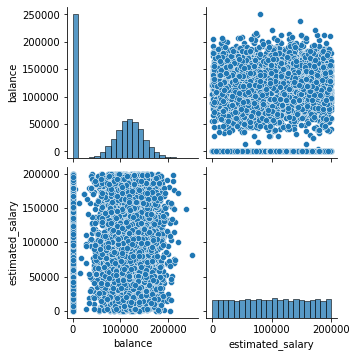

In [16]:
sns.pairplot(bankchurn[['balance','estimated_salary']])

In [17]:
countrydict={"France":0,"Spain":1,"Germany":2}
churn=bankchurn.replace(countrydict)

In [18]:
churn

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,1,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,1,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,0,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,0,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,2,Male,42,3,75075.31,2,1,0,92888.52,1


/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='credit_score'>

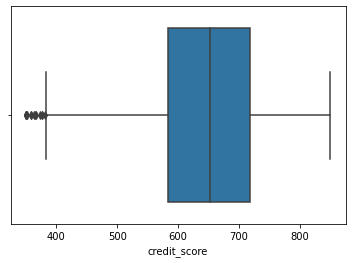

In [19]:
sns.boxplot(churn['credit_score'])

In [20]:
churn[churn['credit_score'] <400]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
7,15656148,376,2,Female,29,4,115046.74,4,1,0,119346.88,1
942,15804586,376,0,Female,46,6,0.00,1,1,0,157333.69,1
1193,15779947,363,1,Female,28,6,146098.43,3,1,0,100615.14,1
1201,15651052,399,2,Male,46,2,127655.22,1,1,0,139994.68,1
1405,15612494,359,0,Female,44,6,128747.69,1,1,0,146955.71,1
1631,15685372,350,1,Male,54,1,152677.48,1,1,1,191973.49,1
1838,15758813,350,2,Male,39,0,109733.20,2,0,0,123602.11,1
1962,15692416,358,1,Female,52,8,143542.36,3,1,0,141959.11,1
2473,15679249,351,2,Female,57,4,163146.46,1,1,0,169621.69,1
2579,15597896,365,2,Male,30,0,127760.07,1,1,0,81537.85,1


/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

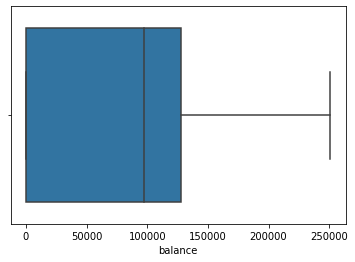

In [21]:
sns.boxplot(churn['balance'])

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='estimated_salary'>

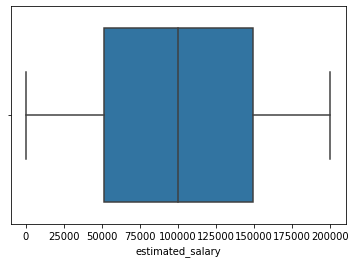

In [22]:
sns.boxplot(churn['estimated_salary'])

In [23]:
churn[(churn.age > 20) & (churn.age > 40)].count().sum()/churn[churn.age > 40].count().sum()

1.0

<AxesSubplot:xlabel='churn', ylabel='count'>

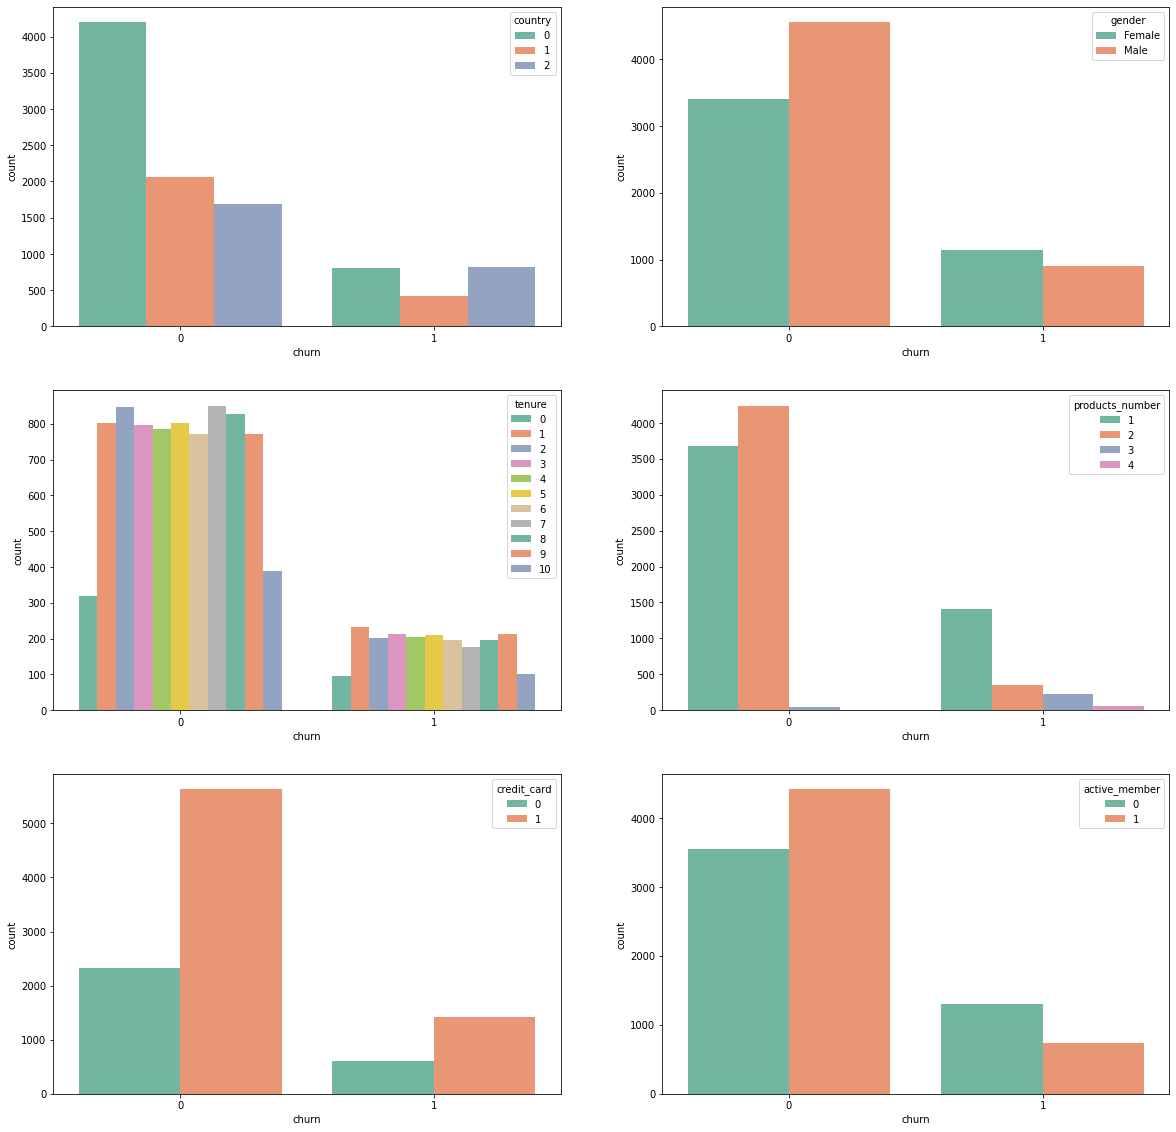

In [24]:
plt.figure(figsize = (20,20))

plt.subplot(3,2,1)
sns.countplot(x = 'churn', hue= 'country', palette='Set2', data = churn)

plt.subplot(3,2,2)
sns.countplot(x = 'churn', hue= 'gender', palette='Set2', data = churn)

plt.subplot(3,2,3)
sns.countplot(x = 'churn', hue= 'tenure', palette='Set2', data = churn)

plt.subplot(3,2,4)
sns.countplot(x = 'churn', hue= 'products_number', palette='Set2', data = churn)

plt.subplot(3,2,5)
sns.countplot(x = 'churn', hue= 'credit_card', palette='Set2', data =churn)

plt.subplot(3,2,6)
sns.countplot(x = 'churn', hue= 'active_member', palette='Set2', data = churn)

<AxesSubplot:xlabel='active_member', ylabel='churn'>

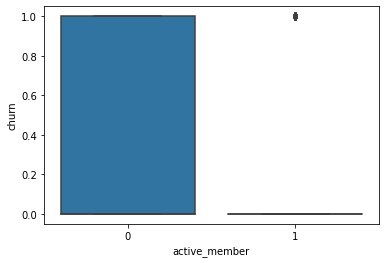

In [25]:
sns.boxplot(x="active_member",y="churn",data=churn)

<AxesSubplot:xlabel='balance', ylabel='credit_score'>

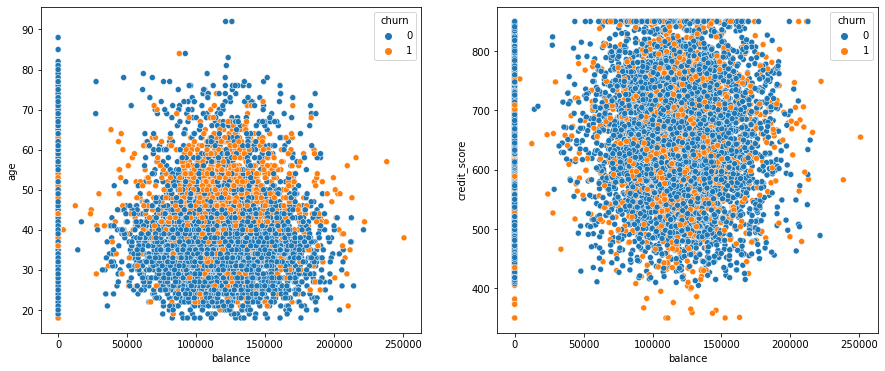

In [26]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(x = "balance", y = "age", data = churn, hue="churn", ax = ax[0])
sns.scatterplot(x = "balance", y = "credit_score", data = churn, hue="churn", ax = ax[1])

In [27]:
!pip install imbalanced-learn

In [28]:
# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
# define dataset
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
names=[ f for f in churn.columns if f!='churn']
X_over, y_over = oversample.fit_resample(churn[names], churn.churn)
# summarize class distribution
print(Counter(y_over))

Counter({1: 7963, 0: 7963})


In [29]:
X_over

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,15634602,619,0,Female,42,2,0.00,1,1,1,101348.88
1,15647311,608,1,Female,41,1,83807.86,1,0,1,112542.58
2,15619304,502,0,Female,42,8,159660.80,3,1,0,113931.57
3,15701354,699,0,Female,39,1,0.00,2,0,0,93826.63
4,15737888,850,1,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
15921,15576216,655,2,Female,37,4,108862.76,1,1,0,79555.08
15922,15613189,774,0,Female,52,2,56580.93,1,1,0,113266.28
15923,15728224,710,2,Female,41,9,149155.53,2,1,0,42131.26
15924,15576824,564,2,Female,44,3,111760.40,3,1,1,104722.47


In [30]:
y_over[y_over==0].count().sum()/y_over[y_over==1].count().sum()

1.0

In [31]:
X_over.groupby('country')['balance'].median()

country
0     68065.800
1     70277.425
2    119024.750
Name: balance, dtype: float64

In [32]:
X_over.groupby('country')['estimated_salary'].median()

country
0    100618.170
1    100626.105
2    101178.850
Name: estimated_salary, dtype: float64

In [33]:
X_over.groupby('country')['credit_score'].median()

country
0    650.0
1    650.0
2    649.0
Name: credit_score, dtype: float64

In [34]:
X_over.groupby('gender')['balance'].median()

gender
Female    101070.69
Male      103688.19
Name: balance, dtype: float64

In [35]:
X_over.groupby('gender')['estimated_salary'].median()

gender
Female    102975.72
Male       97983.44
Name: estimated_salary, dtype: float64

In [36]:
X_over.groupby('gender')['credit_score'].median()

gender
Female    651.0
Male      647.0
Name: credit_score, dtype: float64

In [37]:
X_over.groupby('products_number')['balance'].median()

products_number
1    110511.22
2         0.00
3    105061.74
4    115046.74
Name: balance, dtype: float64

In [38]:
X_over.groupby('products_number')['estimated_salary'].median()

products_number
1     99642.575
2    101069.710
3    104502.020
4    111097.390
Name: estimated_salary, dtype: float64

In [39]:
X_over.groupby('products_number')['credit_score'].median()

products_number
1    649.0
2    651.0
3    650.0
4    642.0
Name: credit_score, dtype: float64

In [40]:
X_over.groupby('active_member')['balance'].median()

active_member
0    103195.2
1    100727.5
Name: balance, dtype: float64

In [41]:
X_over.groupby('active_member')['estimated_salary'].median()

active_member
0    100598.98
1    100722.72
Name: estimated_salary, dtype: float64

In [42]:
X_over.groupby('active_member')['credit_score'].median()

active_member
0    649.0
1    650.0
Name: credit_score, dtype: float64

In [43]:
X_over.groupby('tenure')['balance'].median()

tenure
0     108449.23
1     103560.57
2      99786.07
3     104833.79
4      96974.97
5     100400.18
6      99056.22
7     102453.26
8     105435.74
9     106804.26
10     99835.17
Name: balance, dtype: float64

In [44]:
X_over.groupby('tenure')['estimated_salary'].median()

tenure
0     102362.965
1     101382.860
2     101650.075
3      93336.930
4      95483.480
5     100722.720
6      94598.250
7     104205.625
8     105052.900
9     104152.650
10    100750.030
Name: estimated_salary, dtype: float64

In [45]:
X_over.groupby('tenure')['credit_score'].median()

tenure
0     653.0
1     648.0
2     652.5
3     646.0
4     645.0
5     657.0
6     648.0
7     655.0
8     646.0
9     648.0
10    651.0
Name: credit_score, dtype: float64

In [46]:
genderdict={"Male":0, "Female":1}
X_over=X_over.replace(genderdict)


In [47]:
X_over

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,15634602,619,0,1,42,2,0.00,1,1,1,101348.88
1,15647311,608,1,1,41,1,83807.86,1,0,1,112542.58
2,15619304,502,0,1,42,8,159660.80,3,1,0,113931.57
3,15701354,699,0,1,39,1,0.00,2,0,0,93826.63
4,15737888,850,1,1,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
15921,15576216,655,2,1,37,4,108862.76,1,1,0,79555.08
15922,15613189,774,0,1,52,2,56580.93,1,1,0,113266.28
15923,15728224,710,2,1,41,9,149155.53,2,1,0,42131.26
15924,15576824,564,2,1,44,3,111760.40,3,1,1,104722.47


<AxesSubplot:ylabel='Density'>

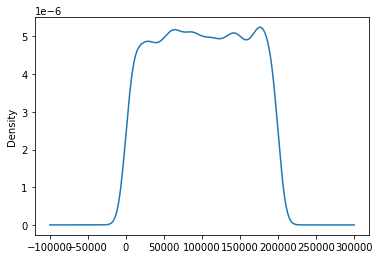

In [48]:
X_over['estimated_salary'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

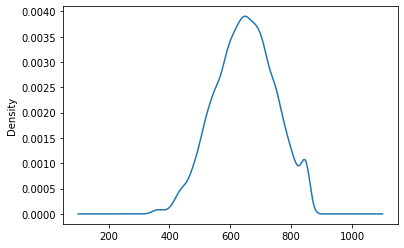

In [49]:
X_over['credit_score'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

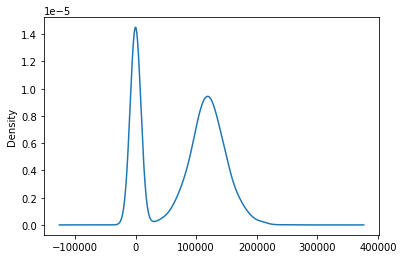

In [50]:
X_over['balance'].plot(kind='kde')

<AxesSubplot:>

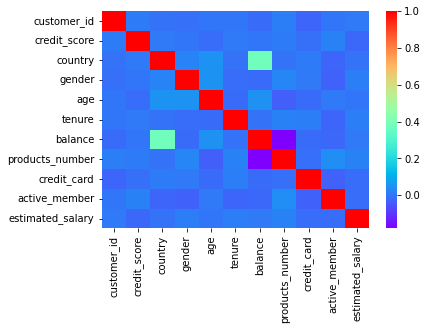

In [51]:
sns.heatmap(X_over.corr(),cmap='rainbow')

In [52]:
X_over[(X_over.age > 10) & (X_over.age<20)].count()

customer_id         62
credit_score        62
country             62
gender              62
age                 62
tenure              62
balance             62
products_number     62
credit_card         62
active_member       62
estimated_salary    62
dtype: int64

In [53]:
X_over[(X_over.age > 20) & (X_over.age<30)].count()

customer_id         1885
credit_score        1885
country             1885
gender              1885
age                 1885
tenure              1885
balance             1885
products_number     1885
credit_card         1885
active_member       1885
estimated_salary    1885
dtype: int64

In [54]:
X_over[(X_over.age > 30) & (X_over.age<40)].count()

customer_id         5359
credit_score        5359
country             5359
gender              5359
age                 5359
tenure              5359
balance             5359
products_number     5359
credit_card         5359
active_member       5359
estimated_salary    5359
dtype: int64

In [55]:
X_over[(X_over.age > 40) & (X_over.age<50)].count()

customer_id         4241
credit_score        4241
country             4241
gender              4241
age                 4241
tenure              4241
balance             4241
products_number     4241
credit_card         4241
active_member       4241
estimated_salary    4241
dtype: int64

In [56]:
X_over[(X_over.age > 50) & (X_over.age<60)].count()

customer_id         1937
credit_score        1937
country             1937
gender              1937
age                 1937
tenure              1937
balance             1937
products_number     1937
credit_card         1937
active_member       1937
estimated_salary    1937
dtype: int64

In [57]:
X_over[(X_over.age > 60) & (X_over.age<70)].count()

customer_id         610
credit_score        610
country             610
gender              610
age                 610
tenure              610
balance             610
products_number     610
credit_card         610
active_member       610
estimated_salary    610
dtype: int64

In [58]:
X_over[(X_over.age > 70) & (X_over.age<80)].count()

customer_id         136
credit_score        136
country             136
gender              136
age                 136
tenure              136
balance             136
products_number     136
credit_card         136
active_member       136
estimated_salary    136
dtype: int64

In [59]:
X_over[(X_over.age > 80) & (X_over.age<90)].count()

customer_id         12
credit_score        12
country             12
gender              12
age                 12
tenure              12
balance             12
products_number     12
credit_card         12
active_member       12
estimated_salary    12
dtype: int64

In [60]:
X_over.groupby('credit_card')['balance'].median().reset_index()

,credit_card,balance
0,0,102081.175
1,1,102606.150


In [61]:
overf=np.zeros(len(X_over.age.values))
for i in range(0,len(X_over.age.values)):
    if (X_over.age.values[i] <= 20):
        overf[i]=0
    if (X_over.age.values[i] >= 21) & (X_over.age.values[i] <= 40):
        overf[i]=1
    if (X_over.age.values[i] >= 41) & (X_over.age.values[i] <= 60):
        overf[i]=2
    if (X_over.age.values[i] >= 61) & (X_over.age.values[i] <= 80):
        overf[i]=3
    if (X_over.age.values[i] >= 81) & (X_over.age.values[i] < 200):
        overf[i]=4

In [62]:
X_over.age.isnull().sum()

0

In [63]:
len(overf)

15926

In [64]:
X_over.age

0        42
1        41
2        42
3        39
4        43
         ..
15921    37
15922    52
15923    41
15924    44
15925    44
Name: age, Length: 15926, dtype: int64

In [65]:
X_over.age=overf

In [66]:
X_over.age

0        2.0
1        2.0
2        2.0
3        1.0
4        2.0
        ... 
15921    1.0
15922    2.0
15923    2.0
15924    2.0
15925    2.0
Name: age, Length: 15926, dtype: float64

In [67]:
X_over=X_over.drop('customer_id',axis=1)

In [68]:
X_over

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,0,1,2.0,2,0.00,1,1,1,101348.88
1,608,1,1,2.0,1,83807.86,1,0,1,112542.58
2,502,0,1,2.0,8,159660.80,3,1,0,113931.57
3,699,0,1,1.0,1,0.00,2,0,0,93826.63
4,850,1,1,2.0,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
15921,655,2,1,1.0,4,108862.76,1,1,0,79555.08
15922,774,0,1,2.0,2,56580.93,1,1,0,113266.28
15923,710,2,1,2.0,9,149155.53,2,1,0,42131.26
15924,564,2,1,2.0,3,111760.40,3,1,1,104722.47


In [69]:
X_over.age[X_over.balance==0].count()/len(X_over.age.values)

0.32092176315459

In [70]:
X_over.tenure.max()

10

In [71]:
X_over.tenure.mean()

4.97507220896647

In [72]:
X_over.country.value_counts()

0    7391
2    4873
1    3662
Name: country, dtype: int64

In [73]:
X_over.products_number.median()

1.0

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tenure'>

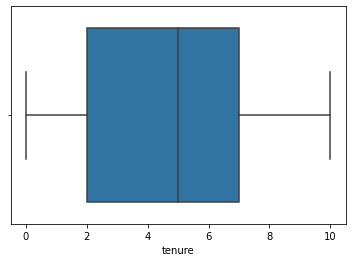

In [74]:
sns.boxplot(X_over.tenure)

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='products_number'>

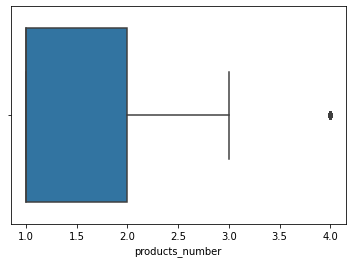

In [75]:
sns.boxplot(X_over.products_number)

In [76]:
overt=np.zeros(len(X_over.tenure))
for i in range(0,len(X_over.tenure)):
    if (X_over.tenure.values[i] >= 0) & (X_over.tenure.values[i] <= 5):
        overt[i]=0
    if (X_over.tenure.values[i] > 5) & (X_over.tenure.values[i] <= 10):
        overt[i]=1

In [77]:
overt

array([0., 0., 1., ..., 1., 0., 0.])

In [78]:
X_over.tenure =overt

In [79]:
X_over

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,0,1,2.0,0.0,0.00,1,1,1,101348.88
1,608,1,1,2.0,0.0,83807.86,1,0,1,112542.58
2,502,0,1,2.0,1.0,159660.80,3,1,0,113931.57
3,699,0,1,1.0,0.0,0.00,2,0,0,93826.63
4,850,1,1,2.0,0.0,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
15921,655,2,1,1.0,0.0,108862.76,1,1,0,79555.08
15922,774,0,1,2.0,0.0,56580.93,1,1,0,113266.28
15923,710,2,1,2.0,1.0,149155.53,2,1,0,42131.26
15924,564,2,1,2.0,0.0,111760.40,3,1,1,104722.47


In [80]:
churn.groupby('tenure')['estimated_salary'].median()

tenure
0     105105.350
1     101693.730
2      96410.125
3      94488.820
4     101728.460
5     102042.600
6      97825.230
7     104205.625
8     101089.760
9      99372.040
10    101240.125
Name: estimated_salary, dtype: float64

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_over[['credit_score','balance','estimated_salary']]=sc.fit_transform(X_over[['credit_score','balance','estimated_salary']])
X_train, X_test,y_train, y_test= train_test_split(X_over,y_over)

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

In [335]:
rc=RandomForestClassifier(n_estimators=50,random_state=42,max_depth=4)
rc.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=50, random_state=42)

In [209]:
!pip install scikit-plot

In [101]:
import scikitplot as skplt

In [336]:
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(rc, X_train, y_train)

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

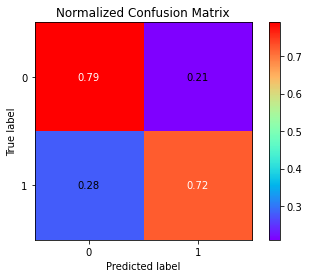

In [337]:
skplt.metrics.plot_confusion_matrix(y_train
                                    , predictions, normalize=True,cmap='rainbow')

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


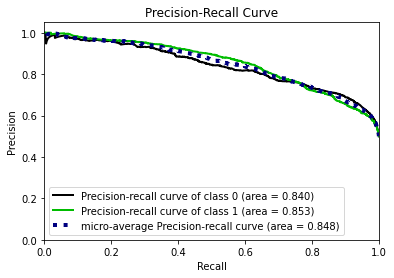

In [338]:
probas = rc.predict_proba(X_train)

skplt.metrics.plot_precision_recall_curve(y_train, probas)
plt.show()

In [339]:
skf=StratifiedKFold(n_splits=5)
X_train=pd.DataFrame(X_train)
y_train=pd.DataFrame(y_train)
ys=np.zeros((9555*5,1))
probs=np.zeros((9555*5,2))
for (train,test), i in zip(skf.split(X_train,y_train),range(0,4)):
    rc.fit(X_train.iloc[train],y_train.iloc[train].values.ravel())
    probs[9555*i:9555*i+9555,0:2]=rc.predict_proba(X_train.iloc[train])
    ys[9555*i:9555*i+9555]=y_train.iloc[train].values
probs=np.array(probs)
ys=np.array(ys)
probs.shape
ys.shape

(47775, 1)

In [274]:
ys.shape

(47775, 1)

In [275]:
probs.shape

(47775, 2)

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

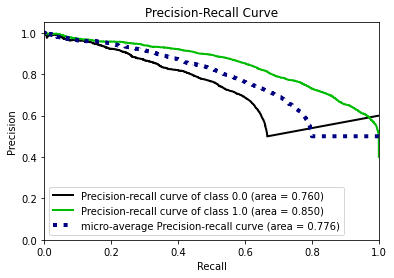

In [340]:
skplt.metrics.plot_precision_recall_curve(ys,probs)

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

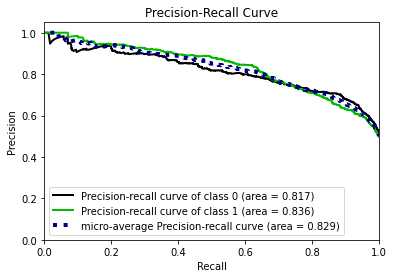

In [341]:
probstest=rc.predict_proba(X_test)
skplt.metrics.plot_precision_recall_curve(y_test,probstest)

In [342]:
importances = rc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rc.estimators_], axis=0)

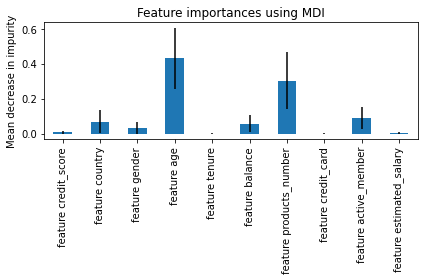

In [343]:
feature_names = [f"feature {i}" for i in (churn.drop(['customer_id','churn'],axis=1).columns)]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [84]:
from sklearn.linear_model import Lasso

In [85]:
X_over['age']=X_over['age'].astype('O')
X_over['products_number']=X_over['products_number'].astype('O')

In [86]:
X_over.dtypes

credit_score        float64
country               int64
gender                int64
age                  object
tenure              float64
balance             float64
products_number      object
credit_card           int64
active_member         int64
estimated_salary    float64
dtype: object

In [87]:
ls=Lasso()
X_over=pd.DataFrame(X_over)
hotencodedover=pd.get_dummies(X_over)

In [88]:
hotencodedover

,credit_score,country,gender,tenure,balance,credit_card,active_member,estimated_salary,age_0.0,age_1.0,age_2.0,age_3.0,age_4.0,products_number_1,products_number_2,products_number_3,products_number_4
0,-0.299814,0,1,0.0,-1.328861,1,1,0.010590,0,0,1,0,0,1,0,0,0
1,-0.411883,1,1,0.0,0.041207,0,1,0.205416,0,0,1,0,0,1,0,0,0
2,-1.491822,0,1,1.0,1.281231,1,0,0.229591,0,0,1,0,0,0,0,1,0
3,0.515234,0,1,0.0,-1.328861,0,0,-0.120335,0,1,0,0,0,0,1,0,0
4,2.053637,1,1,0.0,0.722956,1,1,-0.376929,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15921,0.066958,2,1,0.0,0.450798,1,0,-0.368731,0,1,0,0,0,1,0,0,0
15922,1.279342,0,1,0.0,-0.403892,1,0,0.218012,0,0,1,0,0,1,0,0,0
15923,0.627303,2,1,1.0,1.109493,1,0,-1.020092,0,0,1,0,0,0,1,0,0
15924,-0.860160,2,1,0.0,0.498168,1,1,0.069307,0,0,1,0,0,0,0,1,0


In [89]:
from sklearn.decomposition import PCA
pca=PCA(n_components=9)
pc=pca.fit_transform(hotencodedover.values)

In [90]:
pca.explained_variance_

array([1.25850095, 1.02314062, 0.97874997, 0.56205567, 0.49196526,
       0.34612982, 0.25336343, 0.24815197, 0.23841341])

In [91]:
pc

array([[-1.37122459,  0.28358048,  0.207588  , ..., -0.2118866 ,
        -0.66735083,  0.47823512],
       [ 0.2897423 ,  0.46051797,  0.15359385, ..., -0.30127417,
        -0.70874855,  0.5685732 ],
       [ 0.65171851,  1.28332327,  0.88401491, ...,  0.96482043,
         0.30098634,  0.10819946],
       ...,
       [ 1.38946218, -1.16895309,  0.27799191, ...,  0.91270337,
         0.38960449,  0.06485183],
       [ 1.05418873,  0.65166184,  0.55955638, ..., -0.08993054,
        -0.67938113,  0.40721194],
       [-1.13282023, -1.324069  ,  0.06258341, ..., -0.13298301,
         0.04074126, -0.8843006 ]])

In [109]:
pca2=PCA(n_components=0.95)
pc2=pca2.fit_transform(hotencodedover.values)

In [92]:
X_train1,X_test1, y_train1, y_test1= train_test_split(hotencodedover,y_over)

In [93]:
X_train2,X_test2, y_train2, y_test2= train_test_split(pc,y_over)

In [110]:
X_train3,X_test3,y_train3,y_test3=train_test_split(pc2,y_over)

In [107]:
pd.DataFrame(pc).describe()

,0,1,2,3,4,5,6,7,8
count,1.592600e+04,1.592600e+04,1.592600e+04,1.592600e+04,1.592600e+04,1.592600e+04,1.592600e+04,1.592600e+04,1.592600e+04
mean,-8.264560e-16,-7.509307e-17,-1.061286e-16,1.557421e-16,1.181824e-15,-2.226720e-16,-8.337304e-17,-1.015494e-16,1.044973e-17
std,1.121829e+00,1.011504e+00,9.893179e-01,7.497037e-01,7.014024e-01,5.883280e-01,5.033522e-01,4.981485e-01,4.882760e-01
min,-1.818165e+00,-2.737347e+00,-2.715101e+00,-1.623501e+00,-1.403601e+00,-1.300827e+00,-1.112894e+00,-8.332089e-01,-9.456551e-01
25%,-1.202304e+00,-7.037175e-01,-7.003549e-01,-4.974377e-01,-6.686617e-01,-4.030509e-01,-3.397203e-01,-4.866133e-01,-3.155204e-01
50%,2.357166e-01,-3.613198e-03,3.465041e-03,-2.229280e-01,1.347028e-01,-2.726274e-02,-9.510733e-03,-4.063328e-02,-4.898456e-02
75%,9.951616e-01,7.062225e-01,7.050118e-01,4.978275e-01,6.021313e-01,3.699050e-01,4.129587e-01,3.642205e-01,3.675393e-01
max,2.559744e+00,3.278570e+00,2.900666e+00,1.960081e+00,1.582812e+00,1.886779e+00,1.127933e+00,8.949462e-01,1.097183e+00


In [111]:
pd.DataFrame(pc2).describe()

,0,1,2,3,4,5,6,7,8,9
count,1.592600e+04,1.592600e+04,1.592600e+04,1.592600e+04,1.592600e+04,1.592600e+04,1.592600e+04,1.592600e+04,1.592600e+04,1.592600e+04
mean,-7.893277e-16,-6.473396e-17,9.960881e-18,-1.435357e-17,5.367286e-16,-2.428256e-16,-1.047343e-16,-4.255878e-17,5.933133e-17,3.307455e-17
std,1.121829e+00,1.011504e+00,9.893179e-01,7.497037e-01,7.014024e-01,5.883280e-01,5.033522e-01,4.981485e-01,4.882760e-01,4.538953e-01
min,-1.818165e+00,-2.737347e+00,-2.715101e+00,-1.623501e+00,-1.403601e+00,-1.300827e+00,-1.112894e+00,-8.332089e-01,-9.456551e-01,-4.915941e-01
25%,-1.202304e+00,-7.037175e-01,-7.003549e-01,-4.974377e-01,-6.686617e-01,-4.030509e-01,-3.397203e-01,-4.866133e-01,-3.155204e-01,-3.317410e-01
50%,2.357166e-01,-3.613198e-03,3.465041e-03,-2.229280e-01,1.347028e-01,-2.726274e-02,-9.510733e-03,-4.063328e-02,-4.898456e-02,-2.243360e-01
75%,9.951616e-01,7.062225e-01,7.050118e-01,4.978275e-01,6.021313e-01,3.699050e-01,4.129587e-01,3.642205e-01,3.675393e-01,5.833281e-01
max,2.559744e+00,3.278570e+00,2.900666e+00,1.960081e+00,1.582812e+00,1.886779e+00,1.127933e+00,8.949462e-01,1.097183e+00,8.674560e-01


In [308]:
ls.fit(X_train1,y_train1)
ls.score(X_train1,y_train1)

0.0

In [306]:
coefs = pd.DataFrame(
   ls.coef_,
   columns=['Coefficients'], index=hotencodedover.columns
)

coefs

,Coefficients
0,-0.0
1,0.0
2,0.0
3,0.0
4,-0.0
5,0.0
6,-0.0
7,-0.0
8,-0.0
9,0.0


In [142]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l1',solver='liblinear')
lr.fit(X_train1,y_train1)
lr.score(X_train1,y_train1)

0.7561118553248493

In [143]:
lr.coef_

array([[-0.06346625,  0.40137478,  0.583089  , -0.0612309 ,  0.05038182,
         0.02509691, -0.85947624,  0.02662954, -0.25165404, -0.1451036 ,
         1.50664559,  1.02573426,  0.        , -0.43576811, -1.9090507 ,
         2.11779476,  4.00468309]])

In [144]:
probs2=lr.predict_proba(X_train1)

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

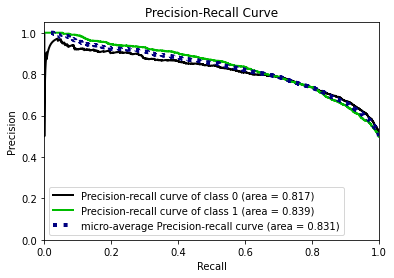

In [145]:
skplt.metrics.plot_precision_recall_curve(y_train1,probs2)

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

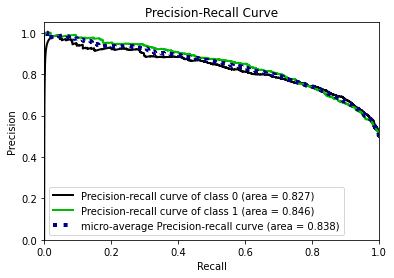

In [146]:
probstest2=lr.predict_proba(X_test1)
skplt.metrics.plot_precision_recall_curve(y_test1,probstest2)

In [344]:
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6964166108506363

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

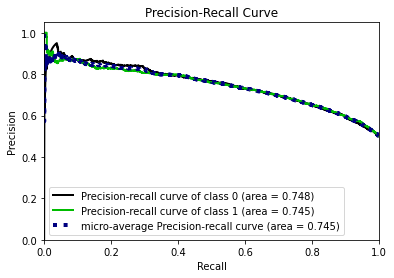

In [347]:
probs3=lr.predict_proba(X_train)
skplt.metrics.plot_precision_recall_curve(y_train,probs3)

In [345]:
lr.score(X_test,y_test)

0.6870919136112507

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

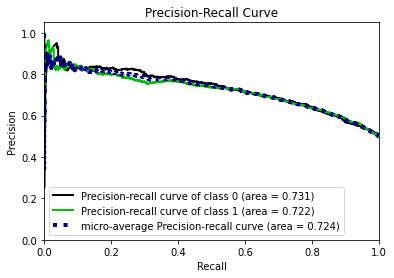

In [348]:
probstest3=lr.predict_proba(X_test)
skplt.metrics.plot_precision_recall_curve(y_test,probstest3)

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

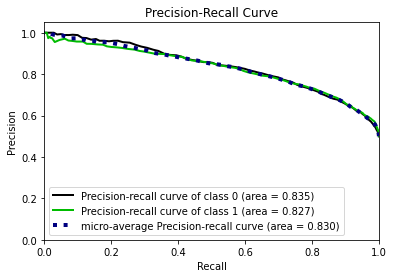

In [390]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(y_train.values))))
knn.fit(X_train,y_train.values.reshape(-1,1))
knn.score(X_train,y_train)
probs4=knn.predict_proba(X_train)
skplt.metrics.plot_precision_recall_curve(y_train,probs4)

<AxesSubplot:>

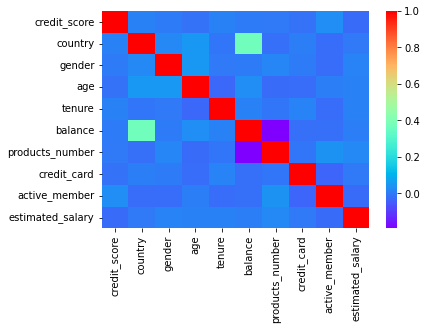

In [384]:
sns.heatmap(X_train.corr(),cmap='rainbow')

In [391]:
knn.score(X_train,y_train)

0.7503348961821835

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

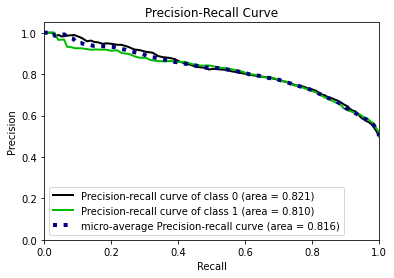

In [392]:
probstest4=knn.predict_proba(X_test)
skplt.metrics.plot_precision_recall_curve(y_test, probstest4)

In [393]:
knn.score(X_test,y_test)

0.7491210447011551

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc=SVC(C=1.0,gamma='auto',probability=True)
c_list=list([0.25,0.5,0.75,0.9,1])
c_values=dict(C=c_list)
gridcv=GridSearchCV(svc,c_values,cv=5,scoring='accuracy')
gridcv.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=SVC(gamma='auto', probability=True),
             param_grid={'C': [0.25, 0.5, 0.75, 0.9, 1]}, scoring='accuracy')

In [366]:
gridcv.best_params_= gridcv.best_score_

In [369]:
svc.fit(X_train,y_train.values.ravel())

SVC(gamma='auto', probability=True)

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

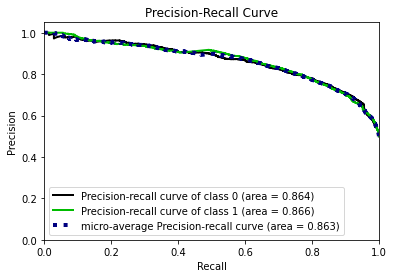

In [370]:
probs5 =svc.predict_proba(X_train)
skplt.metrics.plot_precision_recall_curve(y_train,probs5)

In [376]:
skf=StratifiedKFold(n_splits=5)
X_train=pd.DataFrame(X_train)
y_train=pd.DataFrame(y_train)
ys7=np.zeros((9555*5,1))
probs7=np.zeros((9555*5,2))
for (train,test), i in zip(skf.split(X_train,y_train),range(0,4)):
    svc.fit(X_train.iloc[train],y_train.iloc[train].values.ravel())
    probs7[9555*i:9555*i+9555,0:2]=svc.predict_proba(X_train.iloc[train])
    ys7[9555*i:9555*i+9555]=y_train.iloc[train].values
probs7=np.array(probs7)
ys7=np.array(ys7)

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

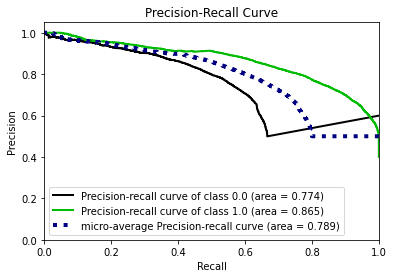

In [394]:
skplt.metrics.plot_precision_recall(ys7,probs7)

In [397]:
!pip install xgboost

     |████████████████████████████████| 1.7 MB 73 kB/s eta 0:00:018


In [96]:
from sklearn.ensemble import GradientBoostingClassifier

In [97]:
xg=GradientBoostingClassifier()

In [404]:
grid = {

    'learning_rate':[0.01,0.05,0.1],

    'n_estimators':np.arange(100,500,100),

}
gb=GridSearchCV(xg, grid, cv = 4)
gb.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=4, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': array([100, 200, 300, 400])})

In [413]:
xg.fit(X_train,y_train.values.ravel())
probs8=xg.predict_proba(X_train)

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

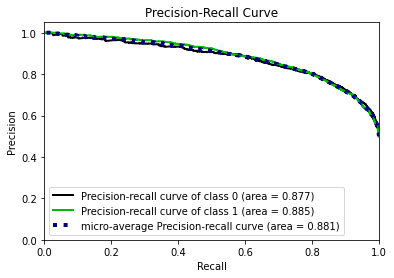

In [414]:
skplt.metrics.plot_precision_recall(y_train.values.ravel(),probs8)

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

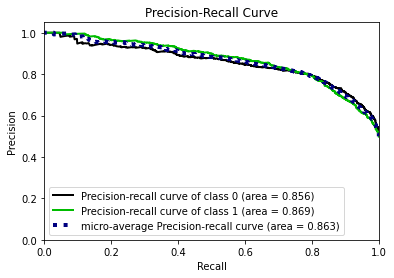

In [416]:
probs8test=xg.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test.values.ravel(),probs8test)

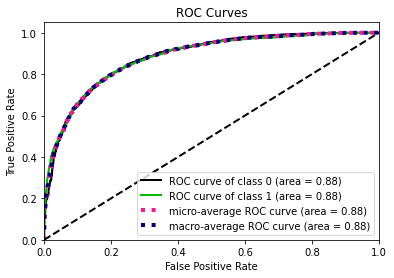

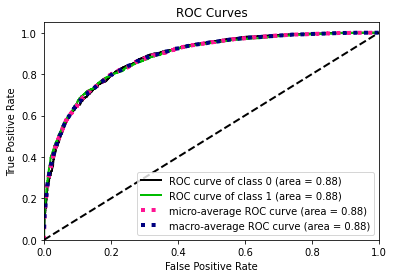

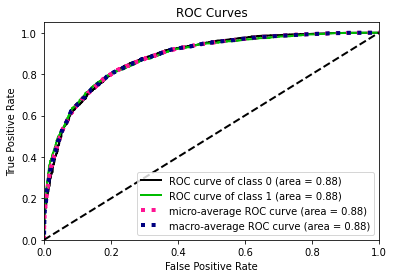

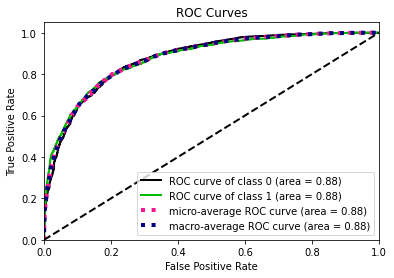

In [115]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
X_train=pd.DataFrame(X_train)
y_train=pd.DataFrame(y_train)
#ys9=np.zeros((9555*5,1))
#probs9=np.zeros((9555*5,2))
for (train,test), i in zip(kf.split(X_train,y_train),range(0,4)):
    xg.fit(X_train.iloc[train],y_train.iloc[train].values.ravel())
    #probs9[9555*i:9555*i+9555,0:2]=xg.predict_proba(X_train.iloc[train])
    #ys9[9555*i:9555*i+9555]=y_train.iloc[train].values
    probs9=xg.predict_proba(X_train.iloc[train])
    ys9=y_train.iloc[train].values
    skplt.metrics.plot_roc(ys9,probs9)
probs9=np.array(probs9)
ys9=np.array(ys9)

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

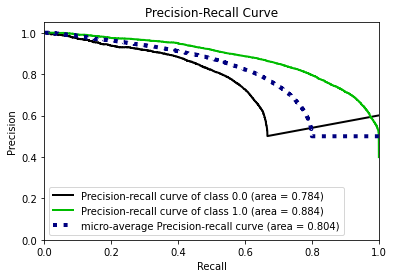

In [110]:
skplt.metrics.plot_precision_recall(ys9,probs9)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

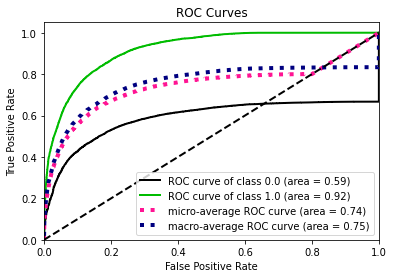

In [111]:
skplt.metrics.plot_roc(ys9,probs9)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

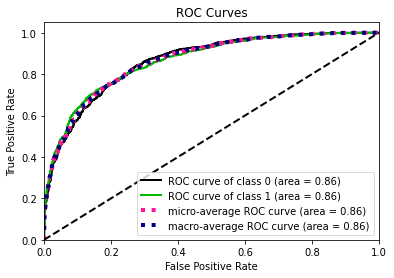

In [113]:
probs9test=xg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,probs9test)

In [147]:
xg.fit(X_train1,y_train1.values.ravel())

GradientBoostingClassifier()

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

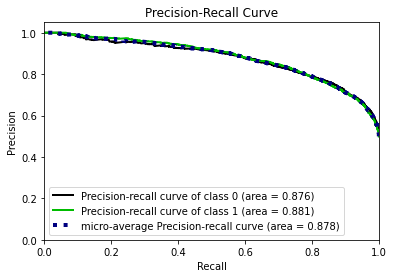

In [148]:
probs10=xg.predict_proba(X_train1)
skplt.metrics.plot_precision_recall(y_train1,probs10)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

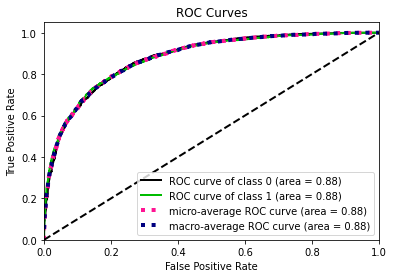

In [149]:
skplt.metrics.plot_roc(y_train1,probs10)

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

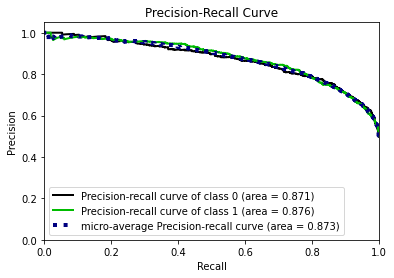

In [150]:
probs10test=xg.predict_proba(X_test1)
skplt.metrics.plot_precision_recall(y_test1,probs10test)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

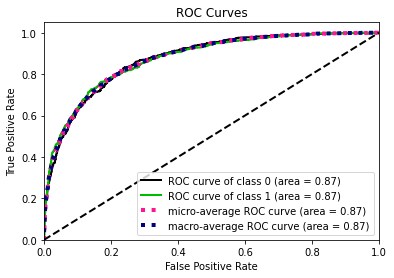

In [151]:
skplt.metrics.plot_roc(y_test1, probs10test)

In [96]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}
dct=DecisionTreeClassifier()
clf_cv=GridSearchCV(dct,parameters, cv=10)
clf_cv.fit(X_train,y_train.values.ravel())
print("tuned hpyerparameters :(best parameters) ",clf_cv.best_params_)
print("accuracy :",clf_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.8933354358963577


<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

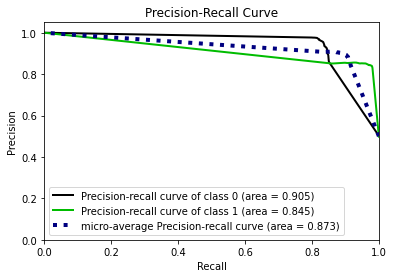

In [427]:
probs11test=clf_cv.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test,probs11test)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

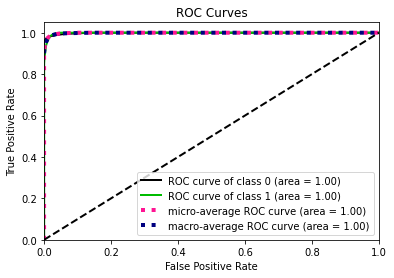

In [97]:
probs11=clf_cv.predict_proba(X_train)
skplt.metrics.plot_roc(y_train, probs11)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

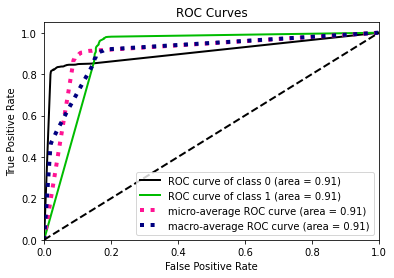

In [433]:
skplt.metrics.plot_roc(y_test, probs11test)

In [189]:
gbx=GradientBoostingClassifier()
parameters2 = {'criterion': [ 'squared_error'],
              'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
                'max_depth': [2*n for n in range(1,5)],
                             'ccp_alpha': [0,2,4]
              }
clf_gbx=GridSearchCV(gbx,parameters2, cv=5)
clf_gbx.fit(X_train,y_train.values.ravel())
print("tuned hpyerparameters :(best parameters) ",clf_gbx.best_params_)
print("accuracy :",clf_gbx.best_score_)


tuned hpyerparameters :(best parameters)  {'ccp_alpha': 0, 'criterion': 'squared_error', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}
accuracy : 0.8946750285542404


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

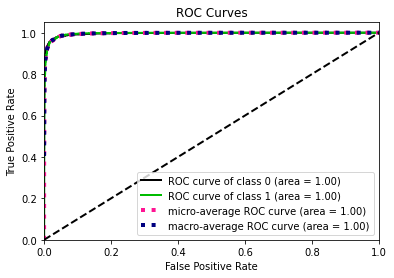

In [463]:
probs12=clf_gbx.predict_proba(X_train)
skplt.metrics.plot_roc(y_train.values.ravel(),probs12)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

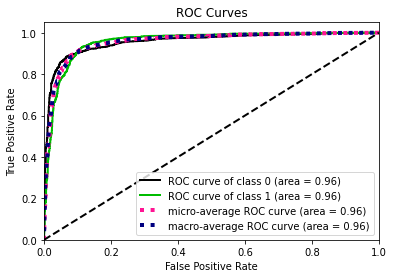

In [464]:
probs12test=clf_gbx.predict_proba(X_test)
skplt.metrics.plot_roc(y_test.values.ravel(),probs12test)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

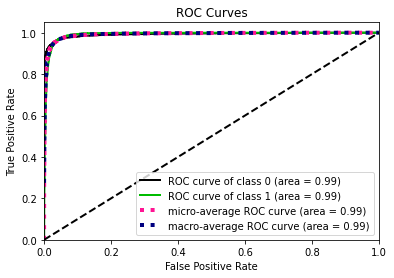

In [191]:
clf_gbx.fit(X_train2,y_train2.ravel())
probs20=clf_gbx.predict_proba(X_train2)
skplt.metrics.plot_roc(y_train2.ravel(),probs20)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

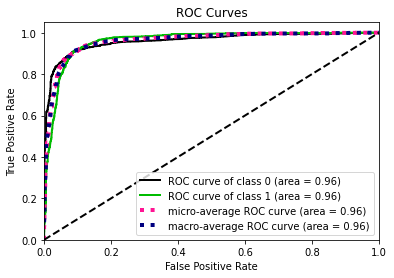

In [192]:
probs20test=clf_gbx.predict_proba(X_test2)
skplt.metrics.plot_roc(y_test2.values.ravel(),probs20test)

In [152]:
# retrying on hotautoencoded data
gbx2=GradientBoostingClassifier()
parameters4 = {'criterion': [ 'squared_error'],
              'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
                'max_depth': [2*n for n in range(1,5)],
                             'ccp_alpha': [0,2,4]
              }
clf_gbx2=GridSearchCV(gbx2,parameters4, cv=5)
clf_gbx2.fit(X_train1,y_train1.values.ravel())
print("tuned hpyerparameters :(best parameters) ",clf_gbx2.best_params_)
print("accuracy :",clf_gbx2.best_score_)



tuned hpyerparameters :(best parameters)  {'ccp_alpha': 0, 'criterion': 'squared_error', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}
accuracy : 0.8964338575814752


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

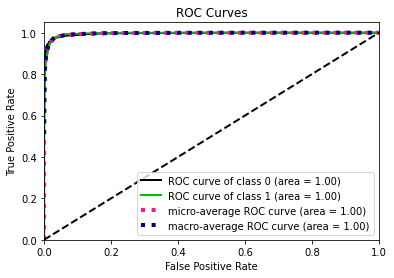

In [154]:
probs122=clf_gbx2.predict_proba(X_train1)
skplt.metrics.plot_roc(y_train1.values.ravel(),probs122)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

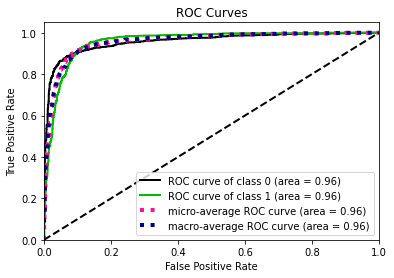

In [155]:
probs122test=clf_gbx2.predict_proba(X_test1)
skplt.metrics.plot_roc(y_test1.values.ravel(),probs122test)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

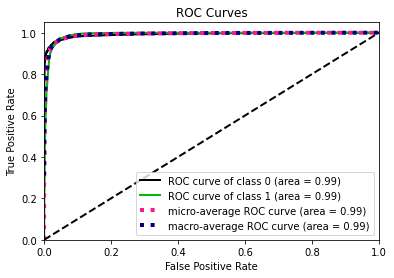

In [183]:
clf_gbx2.fit(X_train2,y_train2.values.ravel())
probs17=clf_gbx2.predict_proba(X_train2)
skplt.metrics.plot_roc(y_train2.values.ravel(),probs17)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

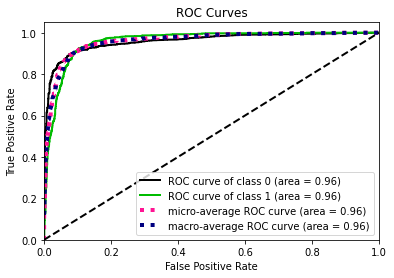

In [184]:
probs17test=clf_gbx2.predict_proba(X_test2)
skplt.metrics.plot_roc(y_test2.values.ravel(),probs17test)

In [98]:
from sklearn.ensemble import HistGradientBoostingClassifier
parameters3 = {'learning_rate': [0, 0.01, 0.02,0.1],
              'min_samples_leaf': [1, 2, 4],
                'max_depth': [2*n for n in range(1,3)],
                'l2_regularization':[0,0.01,0.1,0.4],
               'max_leaf_nodes': [1,2,3,4,5,6]
              }
gbxh=HistGradientBoostingClassifier()
clf_gbxh=GridSearchCV(gbxh,parameters3, cv=6)
clf_gbxh.fit(X_train,y_train.values.ravel())
print("tuned hpyerparameters :(best parameters) ",clf_gbxh.best_params_)
print("accuracy :",clf_gbxh.best_score_)


tuned hpyerparameters :(best parameters)  {'l2_regularization': 0.1, 'learning_rate': 0.1, 'max_depth': 4, 'max_leaf_nodes': 5, 'min_samples_leaf': 4}
accuracy : 0.7847445413910336


/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1296 fits failed out of a total of 3456.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
864 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py", line 305, in fit
    self._validate_parameters()
  File "/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_hist_gradient_bo

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

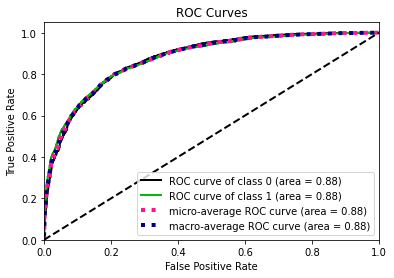

In [485]:
probs13=clf_gbxh.predict_proba(X_train)
skplt.metrics.plot_roc(y_train.values.ravel(),probs13)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

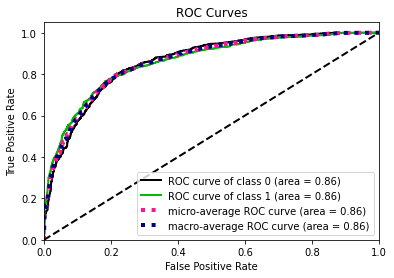

In [486]:
probs13test=clf_gbxh.predict_proba(X_test)
skplt.metrics.plot_roc(y_test.values.ravel(),probs13test)

In [101]:
gbxh.fit(X_train,y_train.values.ravel())
probs14=gbxh.predict_proba(X_train)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

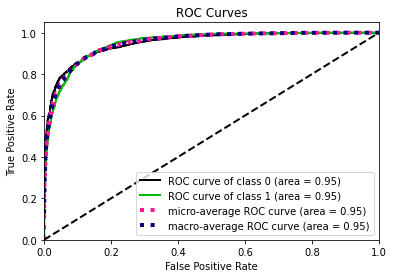

In [102]:
skplt.metrics.plot_roc(y_train.values.ravel(),probs14)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

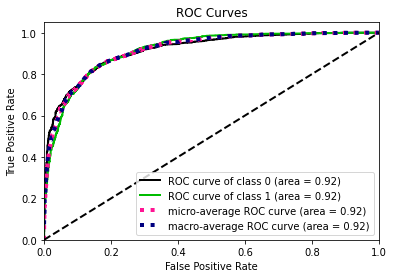

In [104]:
probs14test=gbxh.predict_proba(X_test)
skplt.metrics.plot_roc(y_test.values.ravel(),probs14test)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

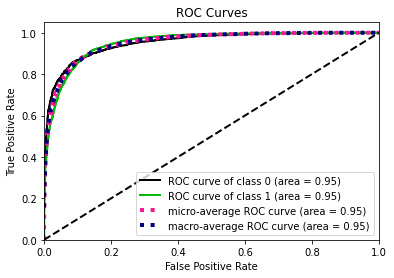

In [157]:
gbxh.fit(X_train1,y_train1.values.ravel())
probs15=gbxh.predict_proba(X_train1)
skplt.metrics.plot_roc(y_train1.values.ravel(),probs15)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

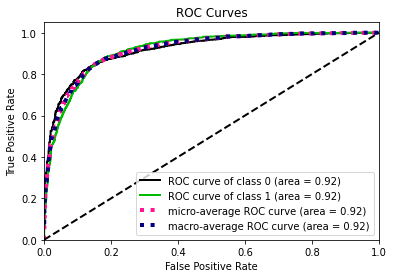

In [158]:
probs15test=gbxh.predict_proba(X_test1)
skplt.metrics.plot_roc(y_test1.values.ravel(),probs15test)

In [176]:
f1_score(y_test1,gbxh.predict(X_test1))

0.8488922081155091

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

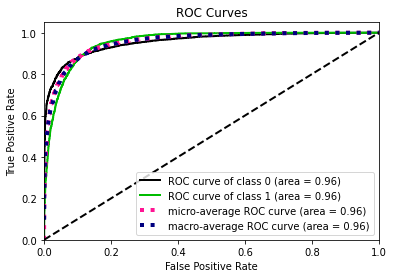

In [186]:
gbxh.fit(X_train2,y_train2.values.ravel())
probs19=gbxh.predict_proba(X_train2)
skplt.metrics.plot_roc(y_train2.values.ravel(),probs19)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

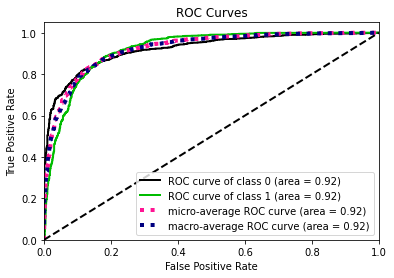

In [187]:
probs19test=gbxh.predict_proba(X_test2)
skplt.metrics.plot_roc(y_test2.values.ravel(),probs19test)

In [102]:
from sklearn.model_selection import KFold

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1296 fits failed out of a total of 3456.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
864 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py", line 305, in fit
    self._validate_parameters()
  File "/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_hist_gradient_bo

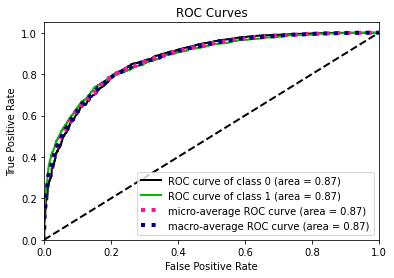

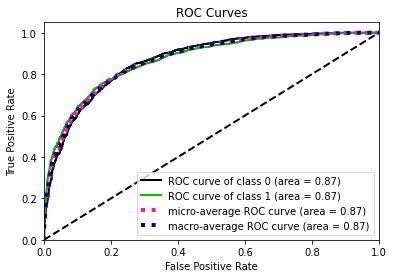

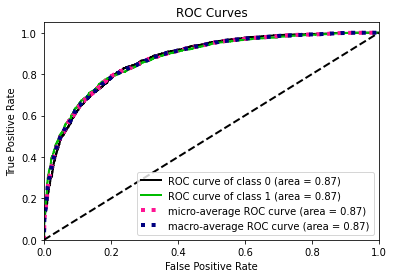

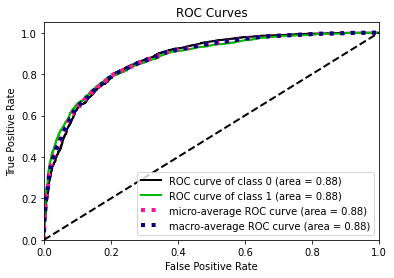

In [108]:

kf = KFold(n_splits=5)
X_train1=pd.DataFrame(X_train1)
y_train1=pd.DataFrame(y_train1)
#ys9=np.zeros((9555*5,1))
#probs9=np.zeros((9555*5,2))
for (train,test), i in zip(kf.split(X_train1,y_train1),range(0,4)):
    clf_gbxh.fit(X_train1.iloc[train],y_train1.iloc[train].values.ravel())
    #probs9[9555*i:9555*i+9555,0:2]=xg.predict_proba(X_train.iloc[train])
    #ys9[9555*i:9555*i+9555]=y_train.iloc[train].values
    probs101=clf_gbxh.predict_proba(X_train1.iloc[train])
    ys101=y_train1.iloc[train].values
    skplt.metrics.plot_roc(ys101,probs101)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

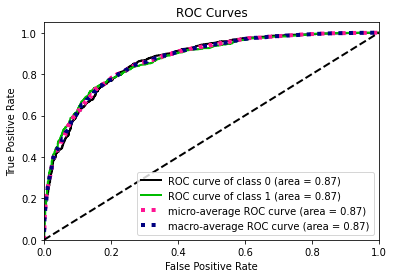

In [160]:

probs1010test=clf_gbxh.predict_proba(X_test1)
skplt.metrics.plot_roc(y_test1.values.ravel(),probs1010test)

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1296 fits failed out of a total of 3456.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
864 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py", line 305, in fit
    self._validate_parameters()
  File "/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_hist_gradient_bo

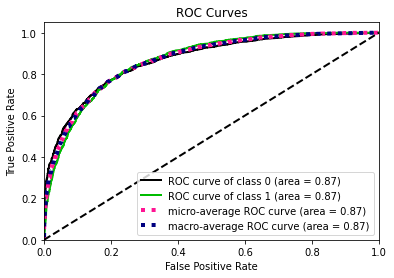

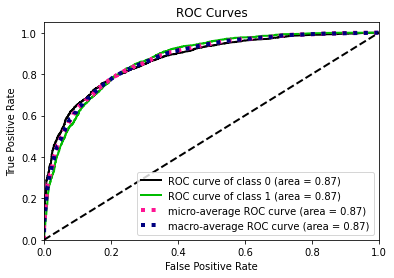

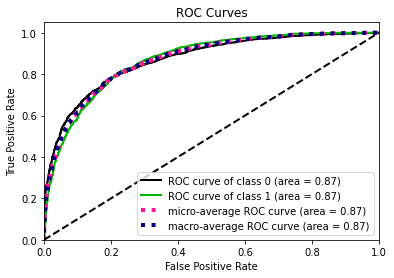

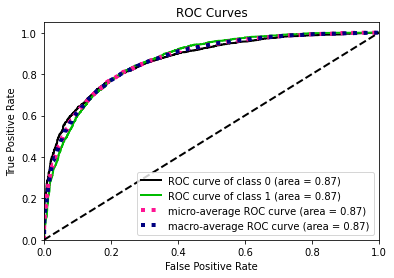

In [104]:

#probs9=np.zeros((9555*5,2))
X_train2=pd.DataFrame(X_train2)
y_train2=pd.DataFrame(y_train2)
for (train,test), i in zip(kf.split(X_train2,y_train2),range(0,4)):
    clf_gbxh.fit(X_train2.iloc[train],y_train2.iloc[train].values.ravel())
    #probs9[9555*i:9555*i+9555,0:2]=xg.predict_proba(X_train.iloc[train])
    #ys9[9555*i:9555*i+9555]=y_train.iloc[train].values
    probs21=clf_gbxh.predict_proba(X_train2.iloc[train])
    ys21=y_train2.iloc[train].values
    skplt.metrics.plot_roc(ys21,probs21)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

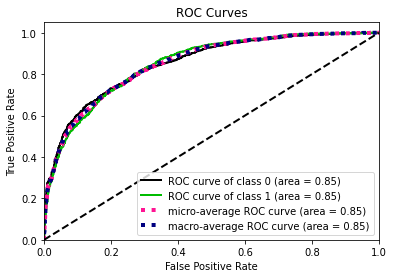

In [105]:
probs21test=clf_gbxh.predict_proba(X_test2)
skplt.metrics.plot_roc(y_test2, probs21test)

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1296 fits failed out of a total of 3456.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
864 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py", line 305, in fit
    self._validate_parameters()
  File "/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_hist_gradient_bo

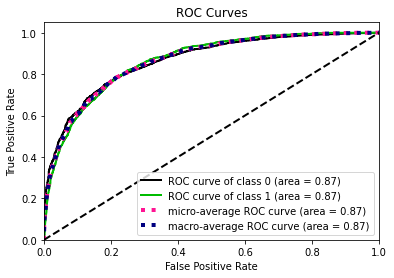

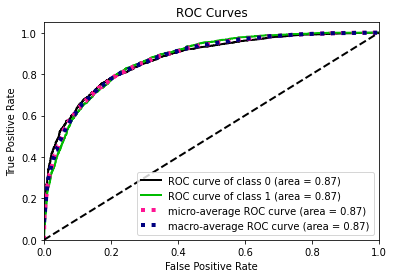

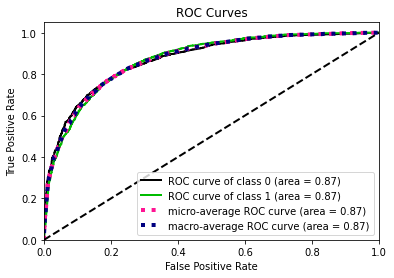

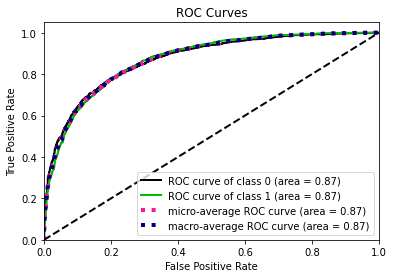

In [114]:
#probs9=np.zeros((9555*5,2))
X_train3=pd.DataFrame(X_train3)
y_train3=pd.DataFrame(y_train3)
for (train,test), i in zip(kf.split(X_train3,y_train3),range(0,4)):
    clf_gbxh.fit(X_train3.iloc[train],y_train3.iloc[train].values.ravel())
    #probs9[9555*i:9555*i+9555,0:2]=xg.predict_proba(X_train.iloc[train])
    #ys9[9555*i:9555*i+9555]=y_train.iloc[train].values
    probs23=clf_gbxh.predict_proba(X_train3.iloc[train])
    ys23=y_train3.iloc[train].values
    skplt.metrics.plot_roc(ys23,probs23)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

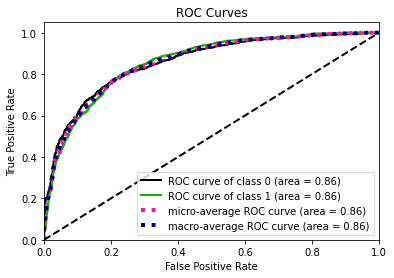

In [115]:
probs24test=clf_gbxh.predict_proba(X_test3)
skplt.metrics.plot_roc(y_test3, probs24test)

In [171]:
from sklearn.metrics import f1_score

In [185]:
f1_score(y_test1,clf_gbxh.predict(X_test1))

0.7829218106995885

In [178]:
xg.fit(X_train2,y_train2.values.ravel())

GradientBoostingClassifier()

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

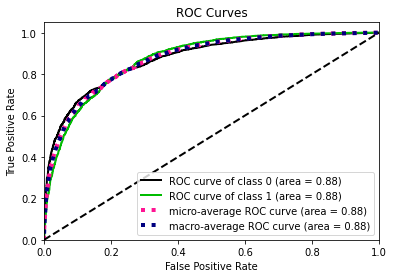

In [179]:
probs16=xg.predict_proba(X_train2)
skplt.metrics.plot_roc(y_train2,probs16)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

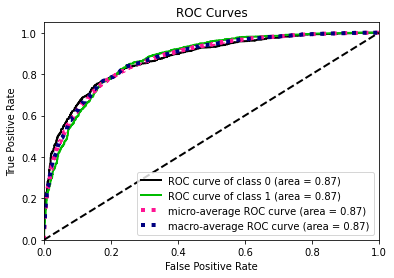

In [180]:
probs16t=xg.predict_proba(X_test2)
skplt.metrics.plot_roc(y_test2,probs16t)

In [181]:
f1_score(y_test2,xg.predict(X_test2))

0.7907676869041647

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

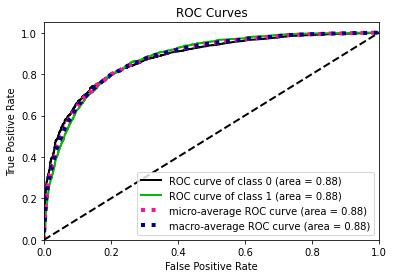

In [112]:
xg.fit(X_train3,y_train3)
probs22=xg.predict_proba(X_train3)
skplt.metrics.plot_roc(y_train3,probs22)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

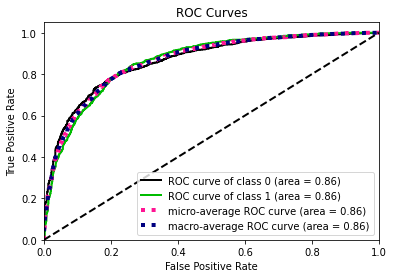

In [113]:
probs22t=xg.predict_proba(X_test3)
skplt.metrics.plot_roc(y_test3,probs22t)

In [125]:
X_train.dtypes

credit_score        float64
country               int64
gender                int64
age                 float64
tenure              float64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
dtype: object

In [138]:
X_train4,X_test4, y_train4,y_test4=train_test_split(X_over,y_over)

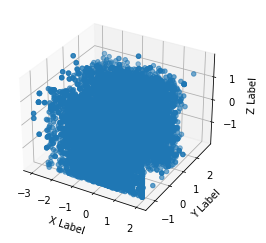

In [199]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100
X_train4=pd.DataFrame(X_train4)
# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
ax.scatter(X_train4['credit_score'].values.reshape(-1,1), X_train4['balance'].values.reshape(-1,1), X_train4['estimated_salary'].values.reshape(-1,1))

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [214]:
from sklearn.ensemble import IsolationForest
iss=IsolationForest(n_estimators=100,random_state=0)
outlierde=iss.fit_predict(X_train4)

In [215]:
idi=np.array(np.where(outlierde==-1))

In [218]:
idi.shape=(9356,1)

In [219]:
for i in idi:
    outlierde[i]=0

In [220]:
outlierde

array([0, 0, 0, ..., 0, 0, 0])

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

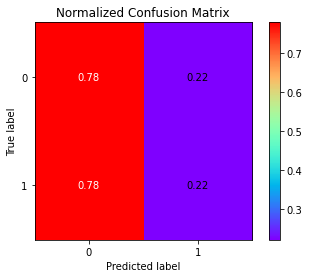

In [221]:
skplt.metrics.plot_confusion_matrix(y_train4
                                    , outlierde, normalize=True,cmap='rainbow')

In [226]:
iss2=IsolationForest(n_estimators=100,random_state=0)
outlierde2=iss2.fit_predict(X_train2)
idi2=np.array(np.where(outlierde2==-1))
for i in idi2:
    outlierde2[i]=0

In [230]:
idi2.shape=(2965,1)

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

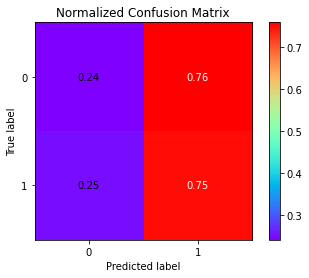

In [231]:
skplt.metrics.plot_confusion_matrix(y_train2
                                    , outlierde2, normalize=True,cmap='rainbow')

In [232]:
outlierde2

array([0, 1, 1, ..., 1, 1, 1])

In [241]:
iss3=IsolationForest(n_estimators=100,random_state=0)
outlierde3=iss3.fit_predict(X_train3)
pred3=iss3.score_samples(X_train3)
#idi3=np.array(np.where(pred==-1))
#for i in idi3:
#    outlierde3[i]=0

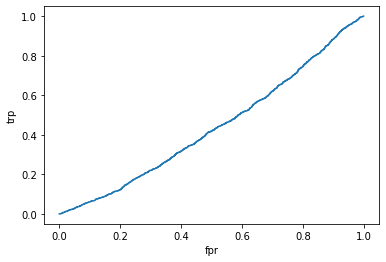

0.5601499378588537

In [244]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import auc
fpr,tpr,threshold = roc_curve(y_train3,pred3)
plt.plot(tpr,fpr)
plt.xlabel('fpr')
plt.ylabel('trp')
plt.show()
auc(fpr,tpr)

In [235]:
idi3.shape=(4497,1)

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

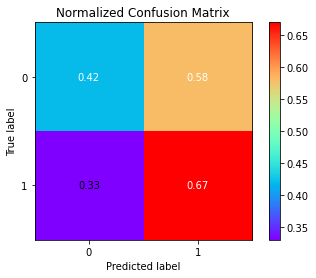

In [236]:
skplt.metrics.plot_confusion_matrix(y_train3
                                    , outlierde3, normalize=True,cmap='rainbow')

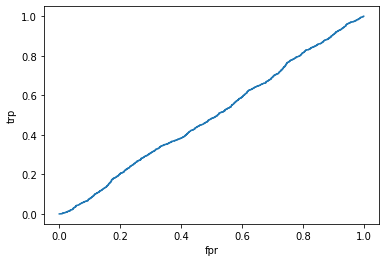

0.503871170622503

In [245]:

pred2=iss2.score_samples(X_train2)
fpr,tpr,threshold = roc_curve(y_train2,pred2)
plt.plot(tpr,fpr)
plt.xlabel('fpr')
plt.ylabel('trp')
plt.show()
auc(fpr,tpr)

In [250]:
param_grid = {'n_estimators': [1000, 1500], 
              'max_samples': [10], 
              'contamination': ['auto', 0.0001, 0.0002], 
              'max_features': [10, 15], 
              'bootstrap': [True], 
              'n_jobs': [-1]}

grid_search = GridSearchCV(iss3, 
                                           param_grid,
                                           scoring="neg_mean_squared_error", 
                                           refit=True,
                                           cv=10, 
                                           return_train_score=True)

grid_search.fit(X_train3)

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


GridSearchCV(cv=10, estimator=IsolationForest(random_state=0),
             param_grid={'bootstrap': [True],
                         'contamination': ['auto', 0.0001, 0.0002],
                         'max_features': [10, 15], 'max_samples': [10],
                         'n_estimators': [1000, 1500], 'n_jobs': [-1]},
             return_train_score=True, scoring='neg_mean_squared_error')

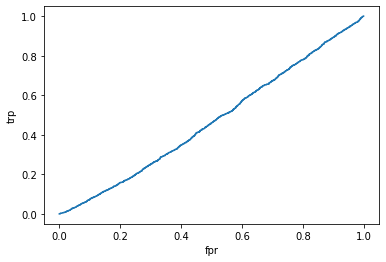

0.5303501564218476

In [251]:
pred4=grid_search.score_samples(X_train3)
fpr, tpr, threshold = roc_curve(y_train3,pred4)
plt.plot(tpr,fpr)
plt.xlabel('fpr')
plt.ylabel('trp')
plt.show()
auc(fpr,tpr)

In [249]:
grid_search.best_params_

{'bootstrap': True,
 'contamination': 0.0001,
 'max_features': 10,
 'max_samples': 10,
 'n_estimators': 1000,
 'n_jobs': -1}

In [256]:
param_grid = {'n_estimators': [1000, 1500], 
              'max_samples': [10], 
              'contamination': ['auto', 0.0001, 0.0002], 
              'max_features': [5, 9], 
              'bootstrap': [True], 
              'n_jobs': [-1]}

grid_search = GridSearchCV(iss2, 
                                           param_grid,
                                           scoring="neg_mean_squared_error", 
                                           refit=True,
                                           cv=10, 
                                           return_train_score=True)

grid_search.fit(X_train2)

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'


GridSearchCV(cv=10, estimator=IsolationForest(random_state=0),
             param_grid={'bootstrap': [True],
                         'contamination': ['auto', 0.0001, 0.0002],
                         'max_features': [5, 9], 'max_samples': [10],
                         'n_estimators': [1000, 1500], 'n_jobs': [-1]},
             return_train_score=True, scoring='neg_mean_squared_error')

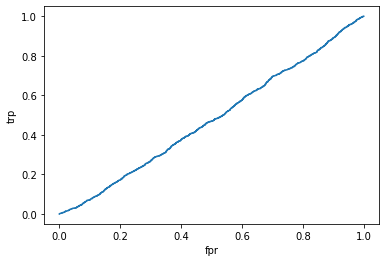

0.5220414084213219

In [257]:
pred5=grid_search.score_samples(X_train2)
fpr, tpr, threshold = roc_curve(y_train2,pred5)
plt.plot(tpr,fpr)
plt.xlabel('fpr')
plt.ylabel('trp')
plt.show()
auc(fpr,tpr)

In [283]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
bag=BaggingClassifier(base_estimator=SVC())
predbag=bag.fit(X_train2,y_train2.values.ravel()).predict_proba(X_train2)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

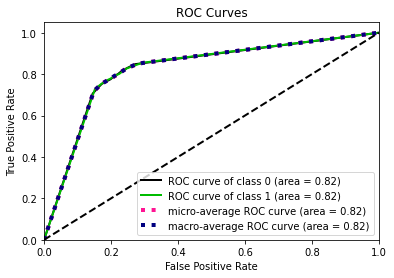

In [284]:
skplt.metrics.plot_roc(y_train2,predbag)

In [305]:
parameters = {"n_estimators": (1, 2),}
#assert isinstance(sklearn.ensemble.estimator_,DecisionTreeClassifier)
gang=GridSearchCV(BaggingClassifier(SVC()), parameters, scoring="roc_auc").fit(X_train2, y_train2.values.ravel()).predict_proba(X_train2)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

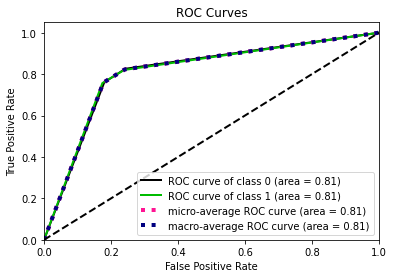

In [306]:
skplt.metrics.plot_roc(y_train2,gang)

In [307]:
training=X_train2.copy()
training['churn']=y_train2
training.to_csv('churntrain.csv')

In [309]:
X_test2=pd.DataFrame(X_test2)
testg=X_test2.copy()
testg['churn']=y_test2
testg.to_csv('churntest.csv')

In [316]:
(y_train2[y_train2==np.nan])

,churn
14366,NaN
14714,NaN
2324,NaN
6762,NaN
6679,NaN
...,...
3789,NaN
6713,NaN
15689,NaN
4711,NaN


In [327]:
y_train2[y_train2 ==np.nan]

,churn
14366,NaN
14714,NaN
2324,NaN
6762,NaN
6679,NaN
...,...
3789,NaN
6713,NaN
15689,NaN
4711,NaN


In [324]:
y_train

2611     0
5368     1
14513    1
8904     1
1021     0
        ..
13270    1
10194    1
7927     1
12679    1
8876     1
Name: churn, Length: 11944, dtype: int64

In [328]:
sampled=X_train3.copy()
sampled['churn']=y_train3
sampled.to_csv('sampledtraining.csv')

In [331]:
X_test3=pd.DataFrame(X_test3)
sampled2=X_test3.copy()
sampled2['churn']=y_test3
sampled2.to_csv('sampledtesting.csv')

In [332]:
sampled3=X_train.copy()
sampled3['churn']=y_train
sampled3.to_csv('sampledtraining2.csv')

In [333]:
sampled4=X_test.copy()
sampled4['churn']=y_test
sampled4.to_csv('sampledtesting2.csv')